Taslima Akter Sathi(2021-1-60-114)

In [ ]:
import os
import cv2  # for image processing
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm  # to show loading progress

# Path to dataset directory
dataset_path = "/kaggle/input/mangoleafbd/MangoLeafBD Dataset"

# Define image size (resize for uniformity)
IMG_SIZE = 128  # e.g., 128x128 pixels

# Initialize lists to store data and labels
data = []
labels = []

# Load images and their respective labels
for folder in os.listdir(dataset_path):
    folder_path = os.path.join(dataset_path, folder)
    if os.path.isdir(folder_path):
        for img_file in tqdm(os.listdir(folder_path), desc=f"Loading {folder}"):
            img_path = os.path.join(folder_path, img_file)
            img = cv2.imread(img_path)
            if img is not None:
                img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
                data.append(img)
                labels.append(folder)

# Convert to numpy arrays for easier manipulation
data = np.array(data)
labels = np.array(labels)
print(f"Data shape: {data.shape}, Labels shape: {labels.shape}")

Loading Die Back: 100%|██████████| 500/500 [00:02<00:00, 175.52it/s]

Data shape: (4000, 128, 128, 3), Labels shape: (4000,)


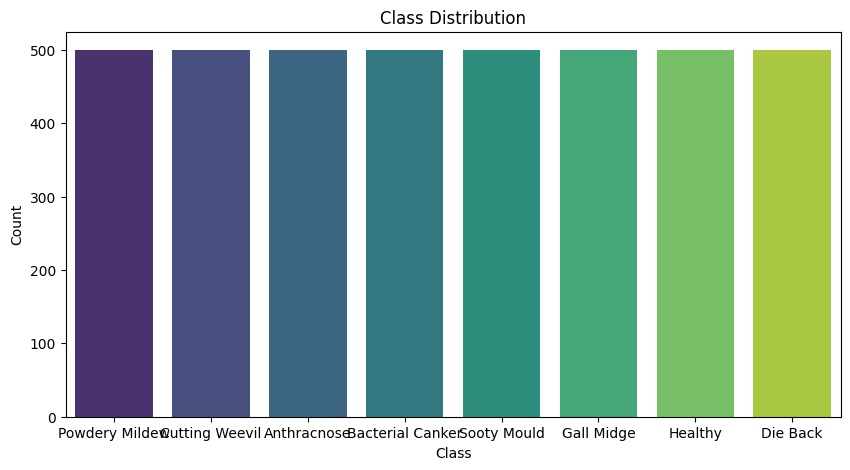

In [ ]:
# Convert labels to a DataFrame for easier visualization
df_labels = pd.DataFrame(labels, columns=['class'])
plt.figure(figsize=(10, 5))
sns.countplot(data=df_labels, x='class', palette='viridis')
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

This code snippet creates a bar plot to visualize the distribution of classes within a dataset. It first converts the `labels` data, which is assumed to contain class labels for each sample, into a DataFrame called `df_labels`, making it easier to work with and visualize. The DataFrame has one column, labeled 'class', which stores the class labels. Next, it uses Seaborn's `countplot` to create a bar plot, with `class` on the x-axis, representing the different class categories, and the count of each class on the y-axis, showing the frequency of each label in the dataset. The `palette='viridis'` argument applies a color gradient to the bars, enhancing visual appeal. Finally, labels and a title are added to the plot for clarity, and the plot is displayed to help identify any imbalances in the class distribution.

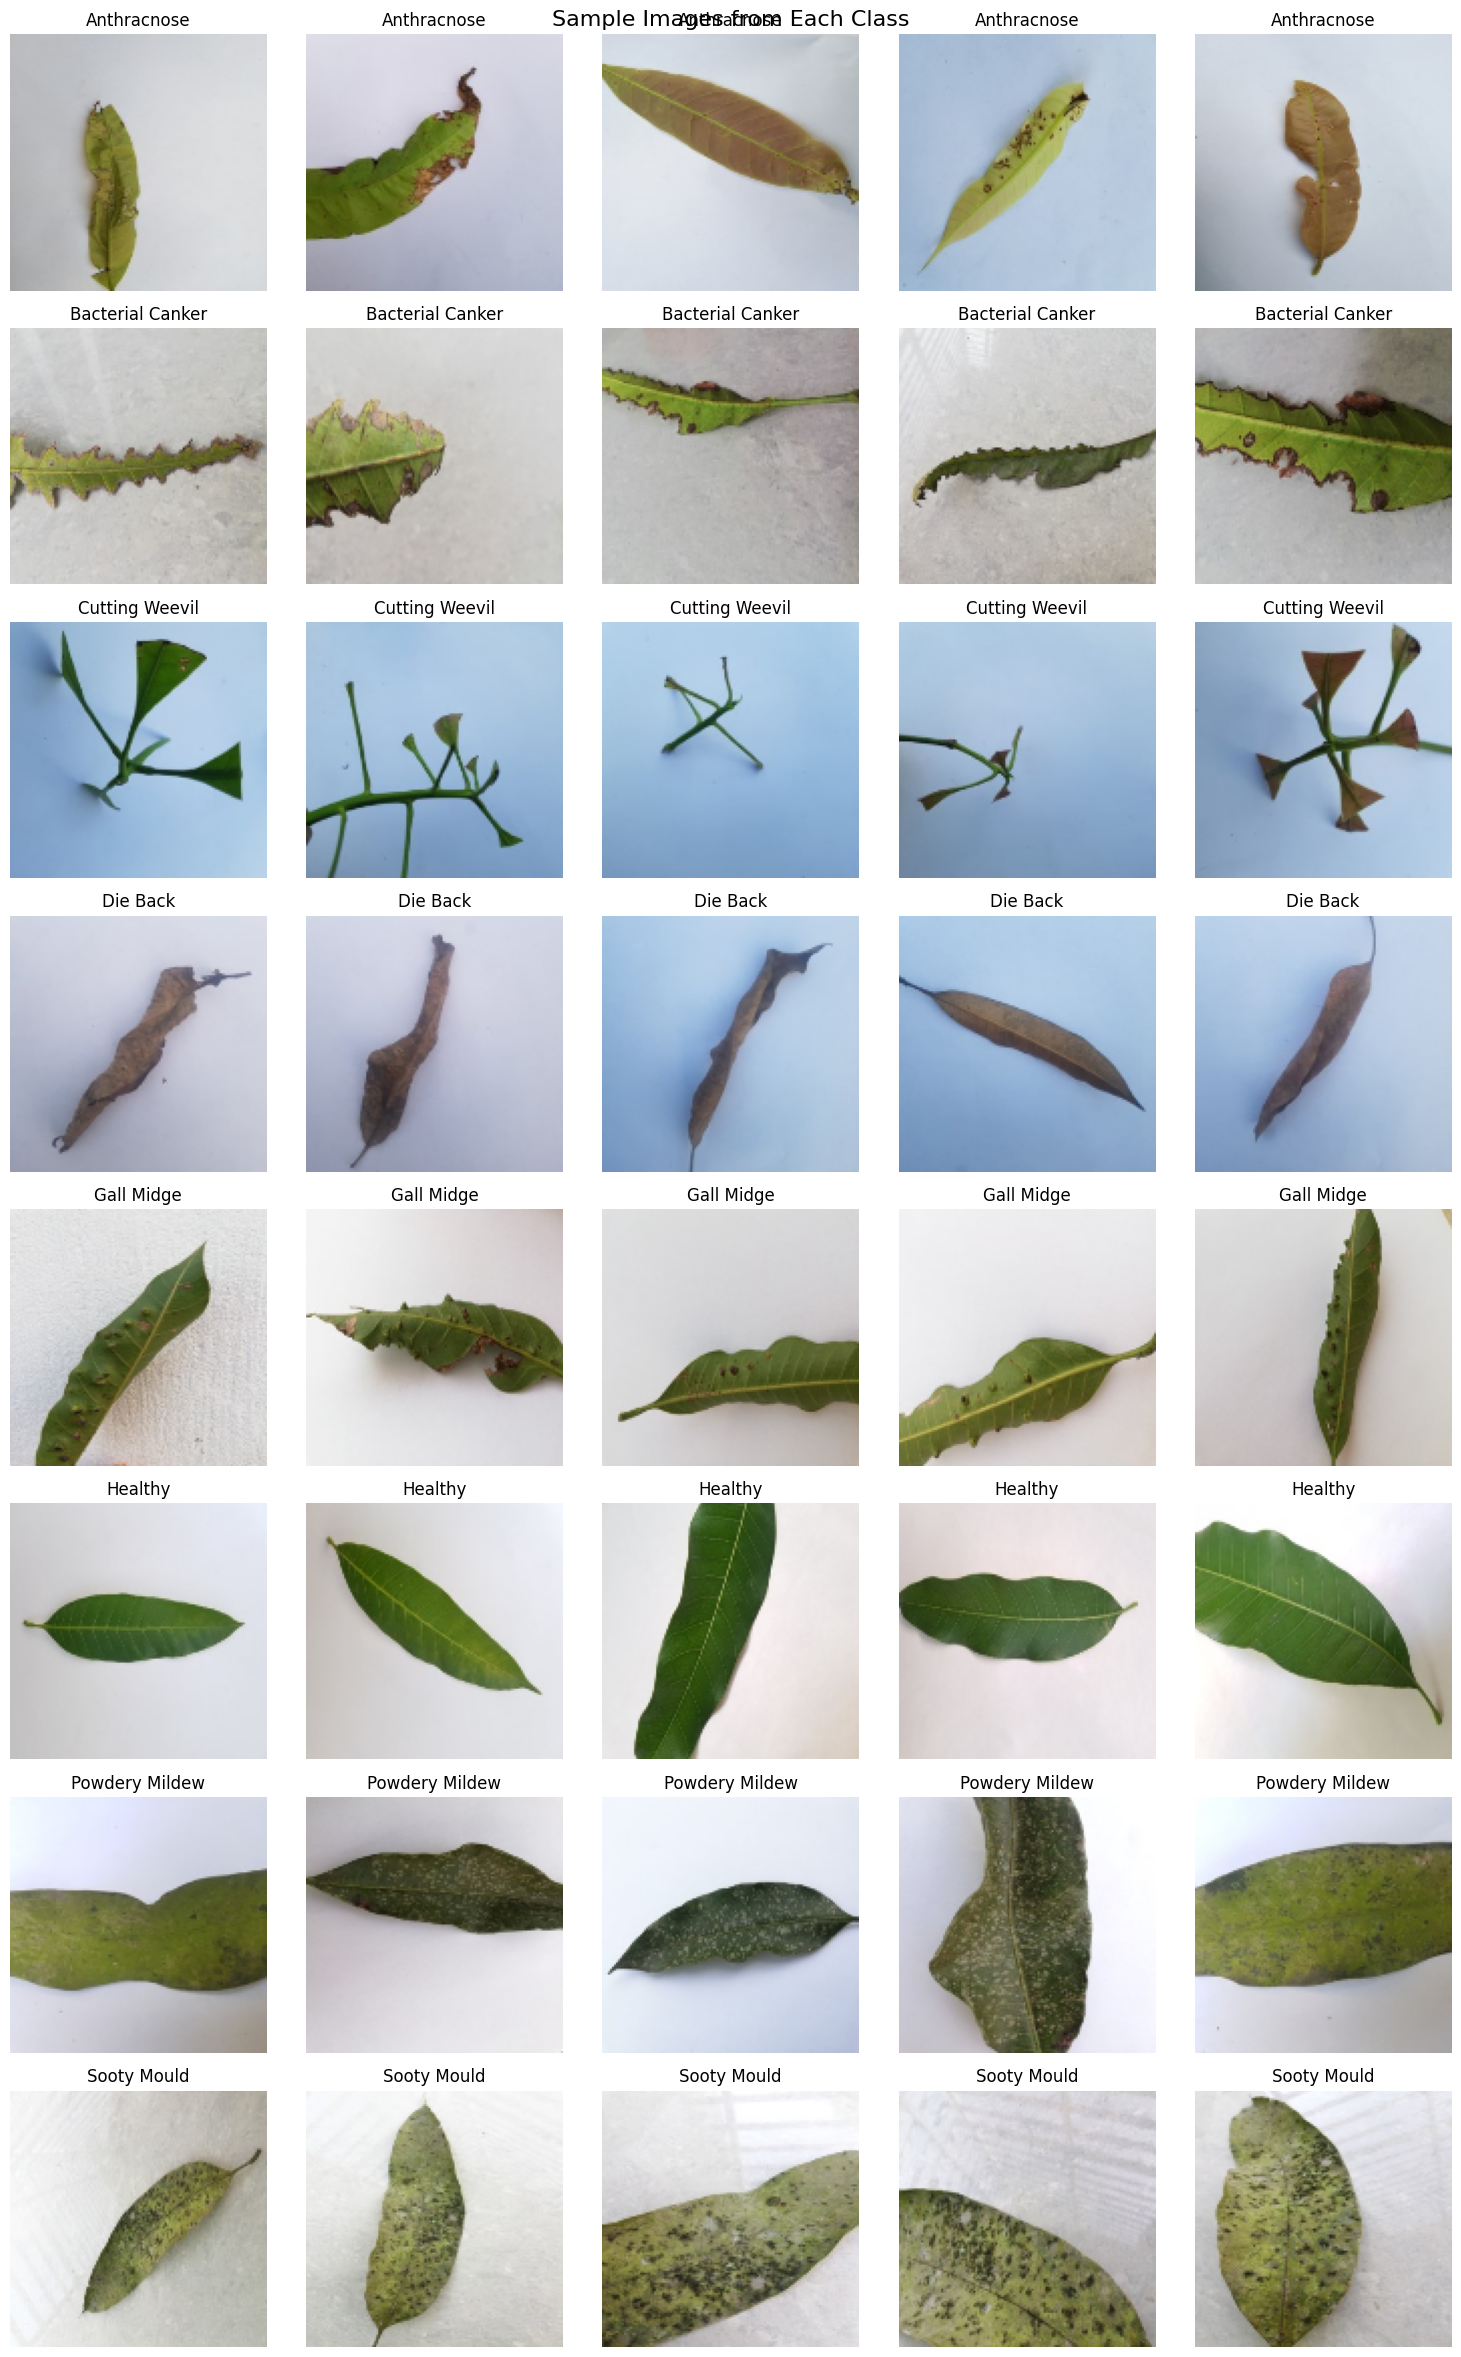

In [ ]:
import random
classes = np.unique(labels)
# Displaying 5 random images from each class
fig, ax = plt.subplots(len(classes), 5, figsize=(15, 6 * len(classes) // 2))  # Adjust figsize for more classes
classes = np.unique(labels)
for i, cls in enumerate(classes):
    cls_indices = np.where(labels == cls)[0]
    sample_images = random.sample(list(cls_indices), 5)
    for j, idx in enumerate(sample_images):
        ax[i, j].imshow(cv2.cvtColor(data[idx], cv2.COLOR_BGR2RGB))
        ax[i, j].axis("off")
        ax[i, j].set_title(cls)

plt.suptitle("Sample Images from Each Class", fontsize=16)
plt.tight_layout()  # Adjust subplot spacing
plt.show()

This code displays five random images from each class in a dataset to visualize examples of each category. It first identifies the unique classes in `labels` and creates a grid of subplots with a row for each class and five columns. For each class, it randomly selects five image indices and displays the images in RGB format. The subplot layout is adjusted for spacing, with titles added for clarity, and `plt.show()` renders the final display, offering a quick way to visually inspect sample images across all classes.

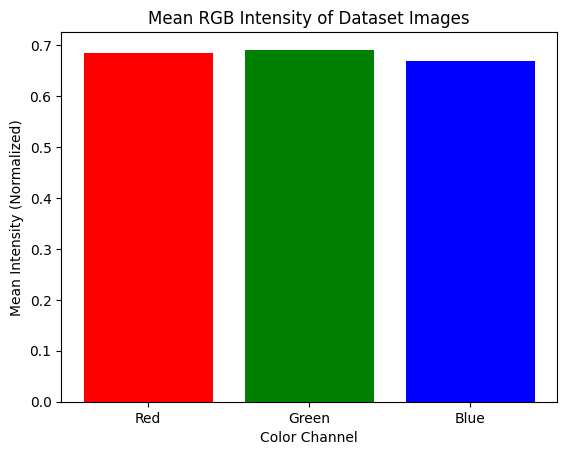

In [ ]:
import matplotlib.pyplot as plt

# Flatten data to calculate mean for each RGB channel
mean_rgb = np.mean(data, axis=(0, 1, 2)) / 255  # normalize values
plt.bar(['Red', 'Green', 'Blue'], mean_rgb, color=['red', 'green', 'blue'])
plt.title("Mean RGB Intensity of Dataset Images")
plt.xlabel("Color Channel")
plt.ylabel("Mean Intensity (Normalized)")
plt.show()

This code calculates and displays the average intensity of each RGB color channel across an entire dataset of images. It first flattens the dataset along the spatial dimensions to compute the mean for each RGB channel and normalizes these values by dividing by 255. Then, it creates a bar plot with each bar representing the mean intensity of one color channel (Red, Green, Blue) using appropriately colored bars. The plot is labeled and titled for clarity, and `plt.show()` renders the chart, giving a quick view of the overall color distribution in the dataset.

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Reshape and normalize data
data_flattened = data.reshape(data.shape[0], -1) / 255.0  # Flatten and normalize
print(f"Flattened Data shape: {data_flattened.shape}")

# Encode labels
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data_flattened, labels_encoded, test_size=0.2, random_state=42)
print(f"Training set size: {X_train.shape}, Test set size: {X_test.shape}")

Flattened Data shape: (4000, 49152)
Training set size: (3200, 49152), Test set size: (800, 49152)


This code preprocesses data for machine learning by flattening, normalizing, encoding labels, and splitting into training and testing sets. First, it reshapes each image in `data` into a 1D array and normalizes pixel values by dividing by 255. Next, `LabelEncoder` converts categorical labels into numerical format. Finally, `train_test_split` divides the processed data and encoded labels into training (80%) and testing (20%) sets, with `random_state=42` to ensure reproducibility. The shapes of the resulting datasets are printed for verification.

**Decision Tree**

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.59      0.66       112
           1       0.71      0.73      0.72       101
           2       0.84      0.95      0.89        86
           3       0.85      0.87      0.86        93
           4       0.45      0.53      0.49        90
           5       0.70      0.67      0.69        91
           6       0.75      0.62      0.68       123
           7       0.58      0.65      0.61       104

    accuracy                           0.69       800
   macro avg       0.70      0.70      0.70       800
weighted avg       0.70      0.69      0.70       800

Decision Tree Accuracy: 0.695


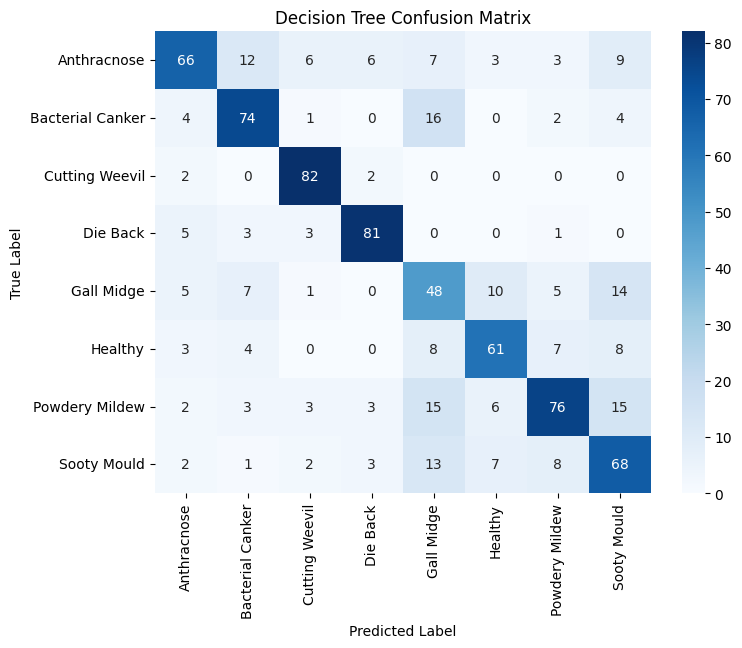

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize and train Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluate performance
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))

# Confusion Matrix for Decision Tree
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dt, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

This code snippet initializes, trains, and evaluates a Decision Tree Classifier on a dataset. First, a `DecisionTreeClassifier` model is created with a fixed `random_state` for reproducibility. The model is then trained using the `X_train` and `y_train` datasets. After training, predictions (`y_pred_dt`) are made on the `X_test` set. The model's performance is assessed using a classification report and accuracy score, which are printed to summarize precision, recall, F1-score, and overall accuracy. A confusion matrix is also generated to show the relationship between true and predicted labels. This matrix is visualized using Seaborn’s `heatmap`, where each cell's color represents the count of predictions, with class labels on the x- and y-axes for better interpretability. This provides insight into the model's accuracy and any common misclassifications.

**Random Forest**

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.84      0.87       112
           1       0.84      0.88      0.86       101
           2       1.00      1.00      1.00        86
           3       0.93      0.94      0.93        93
           4       0.77      0.88      0.82        90
           5       0.80      0.86      0.83        91
           6       0.93      0.81      0.87       123
           7       0.83      0.83      0.83       104

    accuracy                           0.87       800
   macro avg       0.88      0.88      0.88       800
weighted avg       0.88      0.87      0.87       800

Random Forest Accuracy: 0.87375


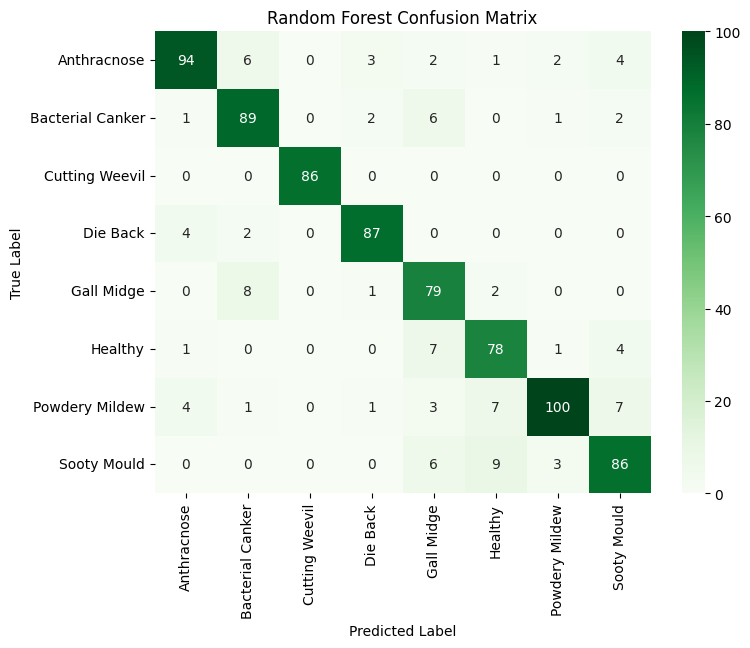

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate performance
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

# Confusion Matrix for Random Forest
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Greens", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

This code snippet demonstrates how to initialize, train, and evaluate a Random Forest Classifier using a dataset. First, a `RandomForestClassifier` is created with 100 decision trees (estimators) and a fixed `random_state` for reproducibility. The model is then trained on the training datasets `X_train` and `y_train`. After training, predictions (`y_pred_rf`) are generated for the `X_test` dataset. The model's performance is evaluated by printing a classification report that includes metrics such as precision, recall, F1-score, and overall accuracy. Additionally, a confusion matrix is computed to visualize the number of correct and incorrect predictions. This matrix is displayed as a heatmap using Seaborn, with the color scheme set to green, enhancing the visual clarity of the classification results. Class labels are included on both the x- and y-axes, allowing for easy interpretation of how the model performed across different classes.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


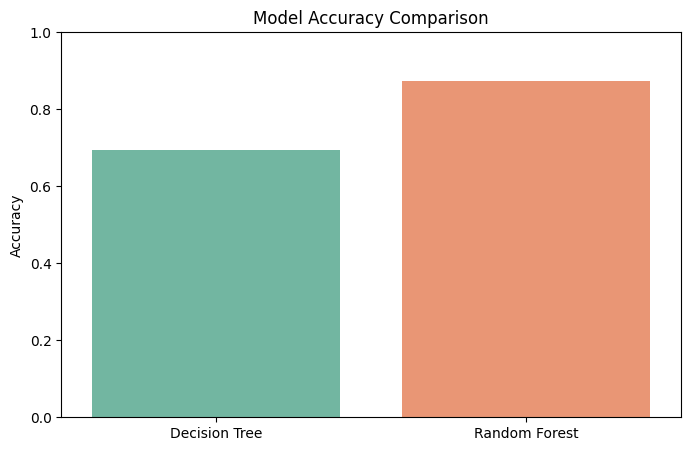

In [ ]:
# Comparing accuracy scores
models = ['Decision Tree', 'Random Forest']
accuracies = [accuracy_score(y_test, y_pred_dt), accuracy_score(y_test, y_pred_rf)]

plt.figure(figsize=(8, 5))
sns.barplot(x=models, y=accuracies, palette='Set2')
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.show()
plt.show()

This code compares the accuracy scores of two models, "Decision Tree" and "Random Forest," by displaying them in a bar plot. It calculates the accuracy for each model using `accuracy_score` on the test labels (`y_test`) and model predictions (`y_pred_dt` for Decision Tree and `y_pred_rf` for Random Forest). The accuracies are then plotted as bars with a palette for color distinction, and the plot is titled and labeled for clarity. The y-axis is limited to a range of 0 to 1, and `plt.show()` renders the plot, providing a visual comparison of model performance.